In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image

import numpy as np
import os

from IPython.display import Image

In [2]:
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

In [3]:
mobile = keras.applications.mobilenet.MobileNet()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [5]:
data_path = "../data/Images/n02097474-Tibetan_terrier/"

In [6]:
os.listdir(data_path)[:10]

['n02097474_1023.jpg',
 'n02097474_1070.jpg',
 'n02097474_1095.jpg',
 'n02097474_1156.jpg',
 'n02097474_120.jpg',
 'n02097474_124.jpg',
 'n02097474_1278.jpg',
 'n02097474_1328.jpg',
 'n02097474_1341.jpg',
 'n02097474_1352.jpg']

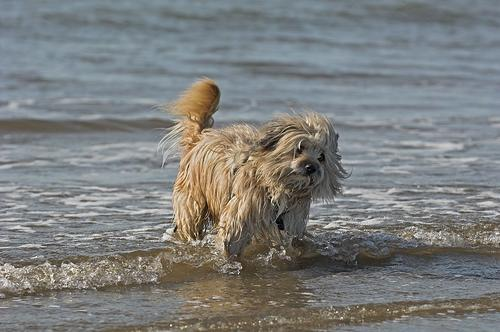

In [7]:
Image(filename=os.path.join(data_path, "n02097474_1023.jpg"))

In [8]:
preprocessed_image = prepare_image(os.path.join(data_path, "n02097474_1023.jpg"))
predictions = mobile.predict(preprocessed_image)
results = decode_predictions(predictions)
results

[[('n02097474', 'Tibetan_terrier', 0.8682031),
  ('n02098413', 'Lhasa', 0.01584748),
  ('n02098105', 'soft-coated_wheaten_terrier', 0.014774462),
  ('n02093754', 'Border_terrier', 0.013422571),
  ('n02096294', 'Australian_terrier', 0.011252454)]]

In [9]:
data_path = "../data/Images/"

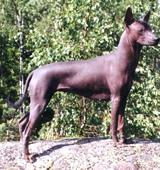

In [10]:
Image(filename=os.path.join(data_path, "n02113978-Mexican_hairless/n02113978_3375.jpg"))

In [11]:
preprocessed_image = prepare_image(os.path.join(data_path, "n02113978-Mexican_hairless/n02113978_3375.jpg"))
predictions = mobile.predict(preprocessed_image)
results = decode_predictions(predictions)
results

[[('n02113978', 'Mexican_hairless', 0.9994562),
  ('n02087046', 'toy_terrier', 0.0002529445),
  ('n02087394', 'Rhodesian_ridgeback', 9.087429e-05),
  ('n02100583', 'vizsla', 6.0845552e-05),
  ('n02090379', 'redbone', 3.8583985e-05)]]

## Retrain MobileNet

In [12]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet

In [13]:
from tensorflow.keras.models import Model

In [14]:
# imports the mobilenet model and discards the last 1000 neuron layer.
base_model = MobileNet(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(2, activation='softmax')(x)

/media/HDD/DogeNetTFModel/lib/python3.6/site-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [15]:
model = Model(inputs=base_model.input, outputs=preds)

In [16]:
for i, layer in enumerate(model.layers):
    print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [17]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:20]:
    layer.trainable = False

for layer in model.layers[20:]:
    layer.trainable = True

In [18]:
# from google_images_download import google_images_download
# response = google_images_download.googleimagesdownload()
# arguments = {"keywords": "blue tit", "limit":100, "print_urls": False, "format": "jpg", "size": ">400*300"}
# paths = response.download(arguments)
# arguments = {"keywords": "crow", "limit": 100, "print_urls": False, "format": "jpg", "size": ">400*300"}
# paths = response.download(arguments)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
from tensorflow.keras.applications.mobilenet import preprocess_input

In [21]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [22]:
train_generator = train_datagen.flow_from_directory('./downloads',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 196 images belonging to 2 classes.


In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

step_size_train = train_generator.n // train_generator.batch_size

In [25]:
model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 5s 740ms/step - loss: 0.0080 - acc: 0.9949
Epoch 2/20
7/7 [==============================] - 5s 716ms/step - loss: 0.2408 - acc: 0.9898
Epoch 3/20
7/7 [==============================] - 5s 744ms/step - loss: 0.1439 - acc: 0.9388
Epoch 4/20
7/7 [==============================] - 5s 719ms/step - loss: 0.1536 - acc: 0.9286
Epoch 5/20
7/7 [==============================] - 5s 742ms/step - loss: 0.4921 - acc: 0.9490
Epoch 6/20
7/7 [==============================] - 5s 731ms/step - loss: 0.1554 - acc: 0.9898
Epoch 7/20
7/7 [==============================] - 5s 729ms/step - loss: 0.0329 - acc: 0.9898
Epoch 8/20
7/7 [==============================] - 5s 740ms/step - loss: 0.0507 - acc: 0.9847
Epoch 9/20
7/7 [==============================] - 5s 723ms/step - loss: 0.0559 - acc: 0.9796
Epoch 10/20
7/7 [==============================] - 5s 729ms/step - loss: 0.0327 - acc: 0.9847
Epoch 11/20
7/7 [==============================] - 5s 733ms/step - lo